****Project Brief****
Problem: Choice Overload. Users waste more time searching than reading because of decision paralysis and a "winner-takes-all" market.
Solution: A context-aware engine that replaces popularity bias with situational matching (mood, time, environment e.g. bedtime, 10mins, long holiday/travelling).
Goal: Reduce decision fatigue and unlock the "Long Tail" of publishing/giving niche books the spotlight while helping readers find the perfect book for their current moment.

****Goodreads Webscraping****
Book data required 
- Genre 
- Title 
- Author
- Rating
- Rating counts 
- Description 
- Page numbers 
- ISBN
- Language 
- Published Year 
- Book Cover Image 
- Link to the book 13

****Open Library API***
Identifiers: ISBN-13
Physical Specs: Number of pages, physical dimensions, weight, and binding type (Hardcover, mass-market paperback, etc.).

Publishing Info: Publisher name, specific publication date, and series name.

Table of Contents: Often includes a full list of chapters (a feature many other APIs lack).

3. The "Author" Layer
Open Library treats authors as distinct entities with their own metadata.

Biographical Data: Full name, birth/death dates, and a biography.

Identifiers: Links to external authority files like VIAF, Wikidata, and Library of Congress ID.

Photos: Portraits of the author when available.

4. Digital & Community Data
Because Open Library is part of the Internet Archive, it includes unique "living" data:

Availability: Data on whether an eBook version is available to borrow, read online, or download.

Community Activity: User-generated Reading Logs (Want to Read, Currently Reading, Have Read), public Book Lists, and user ratings.

Revision History: Every single change made to a record is stored, meaning you can access previous "versions" of a book's data.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time

In [2]:
#Checking if the webscraping works 
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
r = requests.get("https://www.goodreads.com/", headers=headers)
print (r.status_code)

200


In [6]:
soup = BeautifulSoup(r.text, 'html.parser' ) 
print (soup.prettify())

<!DOCTYPE html>
<html class="desktop withSiteHeaderTopFullImage">
 <head>
  <title>
   Goodreads | Meet your next favorite book
  </title>
  <meta content="Find and read more books you’ll love, and keep track of the books you want to read. Be part of the world’s largest community of book lovers on Goodreads." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://www.goodreads.com/" rel="canonical"/>
  <meta content="https://www.goodreads.com/" property="og:url">
   <meta content="Discover and share books you love on Goodreads, the world's largest site for readers and book recommendations!" property="og:description">
    <meta content="Goodreads" property="og:title"/>
    <meta content="website" property="og:type"/>
    <meta content="Goodreads" property="og:site_name"/>
    <meta content="https://s.gr-assets.com/assets/facebook/goodreads_wide-5b93ced856c0da068d73467d3cb82a2c.png" property="og:image"/>
    <meta content="2415071772" property

In [7]:
#create the dictionary of genre list 
genres_list = {}
for a in soup.select("div a.gr-hyperlink href=genres/art"):

_IncompleteInputError: incomplete input (624725715.py, line 3)

In [4]:
#


In [8]:
genre_art = []

for a in soup.select('a.gr-hyperlink[href="/genres/art"]'):
    text = a.get_text(strip=True)
    
    if text:
        genre_art.append(text)

print(genre_art)

['Art']


#genre_art = []
#----------------------------
#for a in soup.select('a.gr-hyperlink[href="/genres/art"]'):
#text = a.get_text(strip=True)
#if text:
   #     genre_art.append(text)

#print(genre_art)

In [9]:
#Best Book Ever List from GoodReads 
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
r = requests.get("https://www.goodreads.com/list/show/1.Best_Books_Ever", headers=headers)
print (r.status_code)

200


In [10]:
#Prettyfing the Best Book Ever Page 
soup = BeautifulSoup(r.text, 'html.parser' ) 
print (soup.prettify())

<!DOCTYPE html>
<html class="desktop withSiteHeaderTopFullImage">
 <head>
  <title>
   Best Books Ever (76723 books)
  </title>
  <meta content="76,723 books based on 285384 votes: The Hunger Games by Suzanne Collins, Pride and Prejudice by Jane Austen, To Kill a Mockingbird by Harper Lee, Harry P..." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://www.goodreads.com/list/show/1.Best_Books_Ever" rel="canonical"/>
  <script type="text/javascript">
   var ue_t0=window.ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "893-4058357-2856294";
    var ue_id = "KCEQYHXYF7DPDXV5YD6R";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}f

In [11]:
#Web Scraping of Best Book Ever List 
# Base URL for the list
base_url = "https://www.goodreads.com/list/show/1.Best_Books_Ever"
page_to_scrape = 1  # Starting page

def scrape_book_details(book_url):
    # This simulates "clicking" into the book
    full_url = "https://www.goodreads.com" + book_url
    response = requests.get(full_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #Title 
    description = soup.find('div', {'class': 'FullExpandContent'})
    return description.text.strip() if description else "No description"

# Pagination Loop
while page_to_scrape <= 2:  # Let's just do 2 pages for this example
    print(f"--- Scraping Page {page_to_scrape} ---")
    params = {'page': page_to_scrape}
    response = requests.get(base_url, params=params)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 1. Find all book links on the list page
    book_links = soup.find_all('a', class_='bookTitle')

    for link in book_links:
        relative_url = link['href']
        title = link.find('span').text
        print(f"Clicking into: {title}")
        
        # 2. Go inside the book page
        desc = scrape_book_details(relative_url)
        print(f"Description found: {desc[:50]}...")
        
        # Respectful delay so you don't get banned
        time.sleep(1)

    page_to_scrape += 1

--- Scraping Page 1 ---
--- Scraping Page 2 ---


In [12]:
#Individual Page 
https://www.goodreads.com/book/show/2767052-the-hunger-games

SyntaxError: invalid syntax (2015339372.py, line 2)

In [22]:
import requests
from bs4 import BeautifulSoup
import json
import re

def scrape_goodreads_dynamic(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return f"Error: Status code {response.status_code}"

    soup = BeautifulSoup(response.content, 'html.parser')

    # 1. Dynamic Link Extraction
    book_link = soup.find("link", rel="canonical")["href"] if soup.find("link", rel="canonical") else url

    # 2. Dynamic Image Extraction
    cover_image = ""
    og_image = soup.find("meta", property="og:image")
    if og_image:
        cover_image = og_image["content"]

    # 3. Dynamic Published Year Extraction
    published_year = "Not found"
    
    # Method A: Search for "First published" text node 
    pub_info_node = soup.find(string=re.compile(r"First published", re.IGNORECASE))
    
    if pub_info_node:
        # Extracts any 4-digit sequence (the year) from that specific text string
        year_match = re.search(r'\b\d{4}\b', pub_info_node)
        if year_match:
            published_year = year_match.group(0)
    
    # Method B: Fallback to JSON-LD structured data if the text isn't found
    if published_year == "Not found":
        json_data = soup.find("script", type="application/ld+json")
        if json_data:
            try:
                data = json.loads(json_data.string)
                # Some pages use 'datePublished'
                if "datePublished" in data:
                    published_year = data["datePublished"][:4]
            except:
                pass

    return {
        "Published Year": published_year,
        "Cover Image": cover_image,
        "Book Link": book_link
    }

url = "https://www.goodreads.com/book/show/2767052-the-hunger-games"
print(json.dumps(scrape_goodreads_dynamic(url), indent=4))

{
    "Published Year": "2008",
    "Cover Image": "https://m.media-amazon.com/images/S/compressed.photo.goodreads.com/books/1586722975i/2767052.jpg",
    "Book Link": "https://www.goodreads.com/book/show/2767052-the-hunger-games"
}


In [13]:
books = pd.DataFrame ({})

In [14]:
#[API] 
#Reading the JikanAPI to see if the call is successful 
jikan_url = "http://discord.jikan.moe"
response = requests.get (jikan_url)
response.status_code

200

In [15]:
#[API]
#Testing the API call with 3 Manga originated Global Intellectual Property Hits; 'One Piece', 'Kimetsu no Yaiba (Demon Slayers)', 'Dandadan'
def get_manga_info(manga_id):
    url = f"https://api.jikan.moe/v4/manga/{manga_id}/full"
    
    try:
        response = requests.get(url)
        
        if response.status_code != 200:
            print(f"Server Error for ID {manga_id}: {response.status_code}")
            return None
            
        if not response.text.strip():
            print(f"Empty envelope for ID {manga_id}. The server sent nothing.")
            return None
            
        return response.json()['data']
        
    except Exception as e:
        print(f"Connection error for ID {manga_id}: {e}")
        return None

ids = [13, 96792, 135496] # One Piece, Demon Slayer, Dandadan
manga_results = []

for m_id in ids:
    data = get_manga_info(m_id)
    if data:
        manga_results.append(data)
        print(f"Successfully pulled: {data['title']}")
    
    # wait 2 seconds before running it again 
    time.sleep(2)

Successfully pulled: One Piece
Successfully pulled: Kimetsu no Yaiba
Successfully pulled: Dandadan


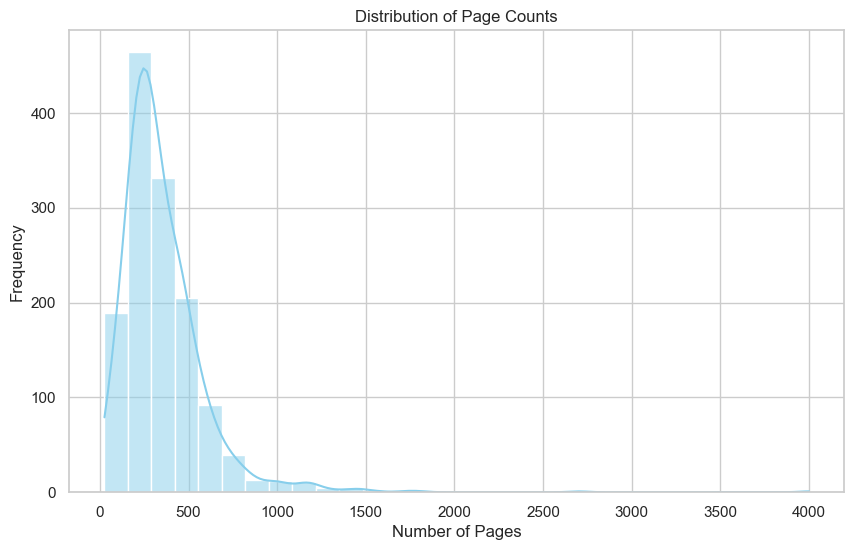

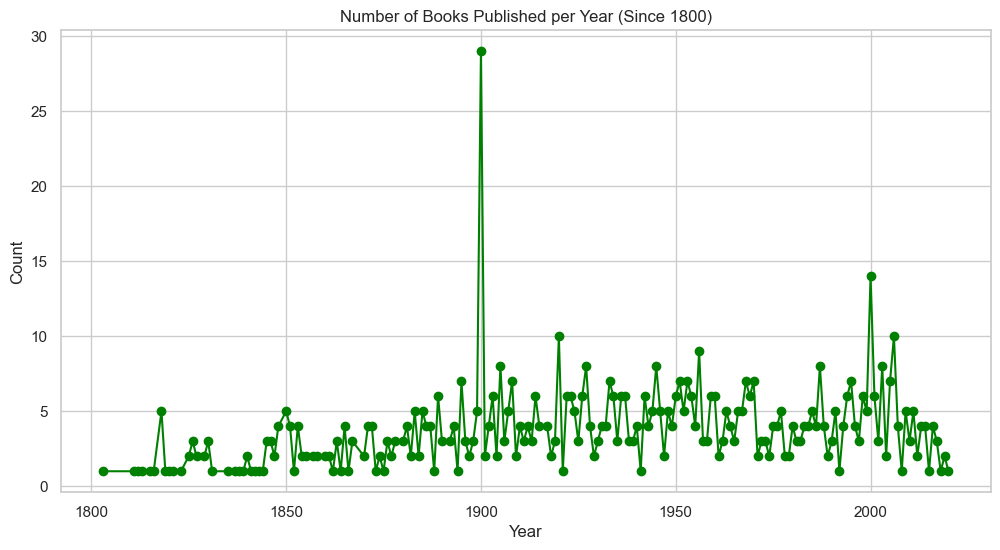

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35704\455052205.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


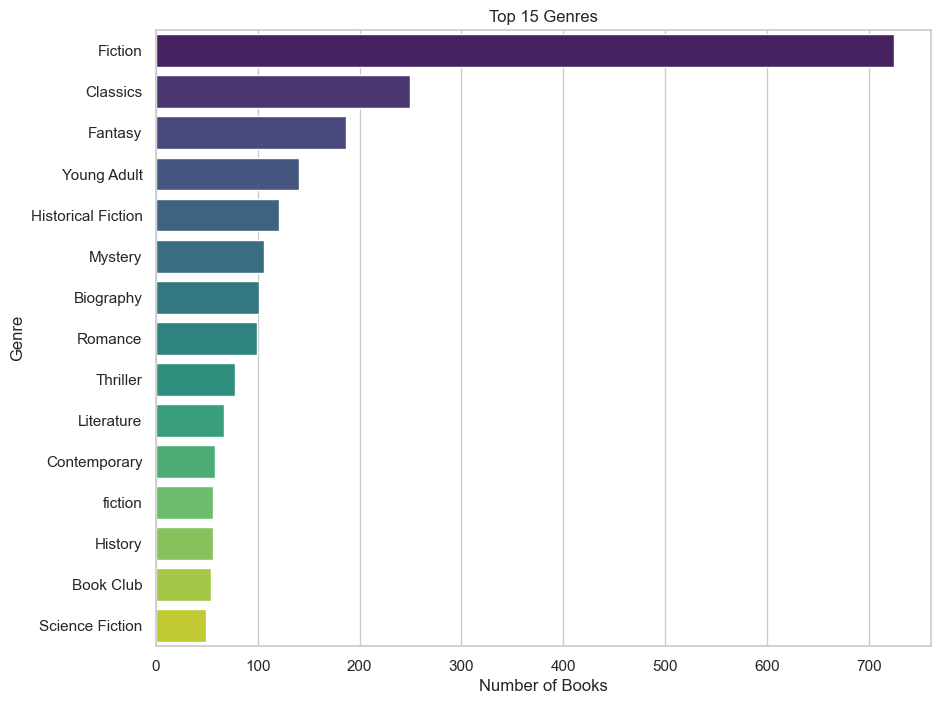

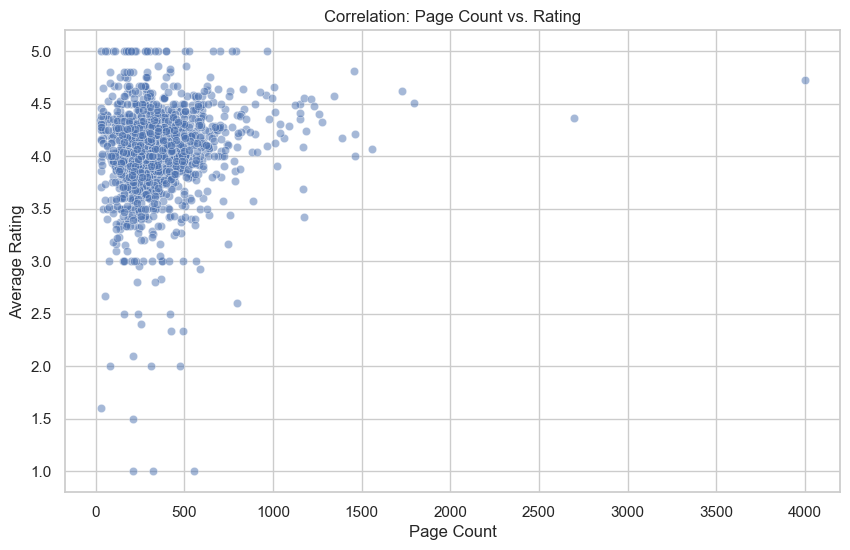

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PATH = Path(r".../data/processed/books_dedup.csv")

df = pd.read_csv(DATA_PATH)

# Basic cleaning
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['published_year'] = pd.to_numeric(df['published_year'], errors='coerce')

sns.set_theme(style="whitegrid")

# PAGE COUNT
plt.figure(figsize=(10, 6))
sns.histplot(df['pages'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Page Counts')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# BOOKS PER YEAR
plt.figure(figsize=(12, 6))
year_counts = df[df['published_year'] > 1800]['published_year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o', color='green')
plt.title('Number of Books Published per Year (Since 1800)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# TOP GENRES
all_genres = df['genres'].dropna().str.split(', ')
exploded_genres = all_genres.explode()
top_genres = exploded_genres.value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()

# RATINGS VS PAGE COUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pages', y='rating', alpha=0.5)
plt.title('Correlation: Page Count vs. Rating')
plt.xlabel('Page Count')
plt.ylabel('Average Rating')
plt.show()